## IMPORT LIBRARY

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter

import warnings
warnings.filterwarnings("ignore")

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [58]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Internship DDB Telkom/Learning-BigData-PijarMahir")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## READ DATASET

In [59]:
dataset = pd.read_csv('online_retail_II.csv')
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## PREPROCESSING DATA

In [60]:
# Duplikat data
dataset.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


34335

In [61]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [62]:
# Tipe data
dataset.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [63]:
# Data kosong
dataset.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [64]:
# Tambah kolom baru dengan nama Sales dengan formula Quantity * Price
dataset["Sales"] = dataset["Quantity"] * dataset["Price"]

# Tambah kolom baru Monthyear
dataset["MonthYear"] = pd.to_datetime(dataset["InvoiceDate"]).dt.to_period('M').dt.to_timestamp()
dataset = dataset[dataset.MonthYear<"2011-12"]
dataset.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,MonthYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,2009-12-01
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5,2009-12-01
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,2009-12-01
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0,2009-12-01


In [65]:
# Cek deskripsi
dataset.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,Price,Customer ID,Sales
count,1.007789e+06,1.007789e+06,780502.000000,1.007789e+06
mean,1.010536e+01,4.597282e+00,15313.393466,1.828043e+01
std,1.356911e+02,1.219727e+02,1695.765797,1.808504e+02
min,-7.421500e+04,-5.359436e+04,12346.000000,-7.718360e+04
25%,1.000000e+00,1.250000e+00,13963.000000,3.750000e+00
50%,3.000000e+00,2.100000e+00,15239.000000,9.950000e+00
75%,1.000000e+01,4.150000e+00,16788.000000,1.770000e+01
max,7.421500e+04,3.897000e+04,18287.000000,7.718360e+04


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

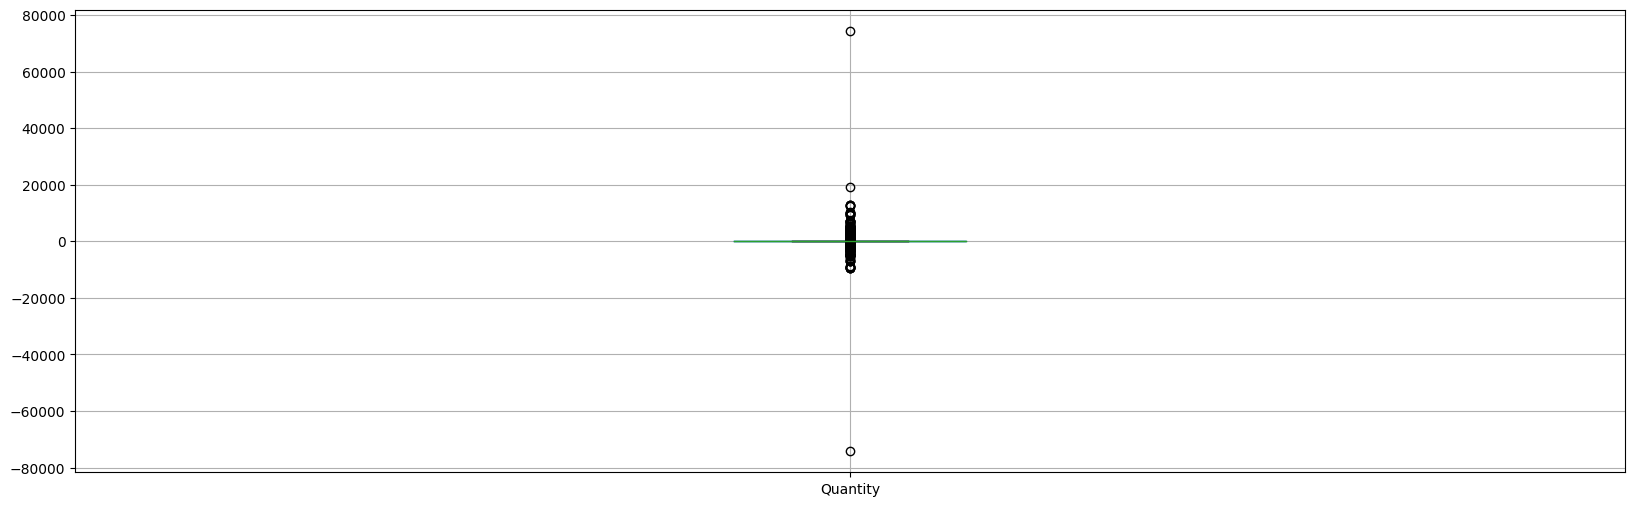

In [66]:
# Cek outlier
dataset[["Quantity"]].boxplot()

In [67]:
# Hilangkan outlier
def remove_outlier(df_in, col_name):
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1
  fence_low = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
  return df_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity
count,895830.000000
mean,4.580521
std,4.537991
min,-12.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,23.000000


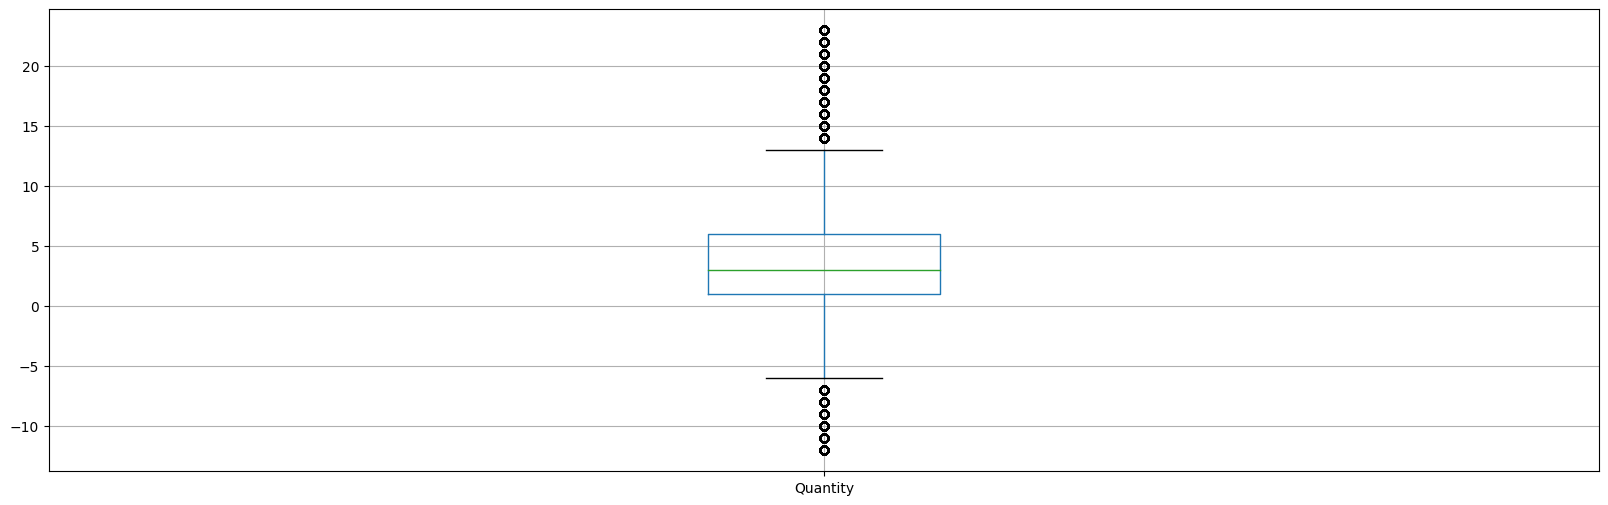

In [68]:
remove_outlier(dataset,"Quantity")[["Quantity"]].boxplot()
remove_outlier(dataset,"Quantity")[["Quantity"]].describe()

## VISUALISASI

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

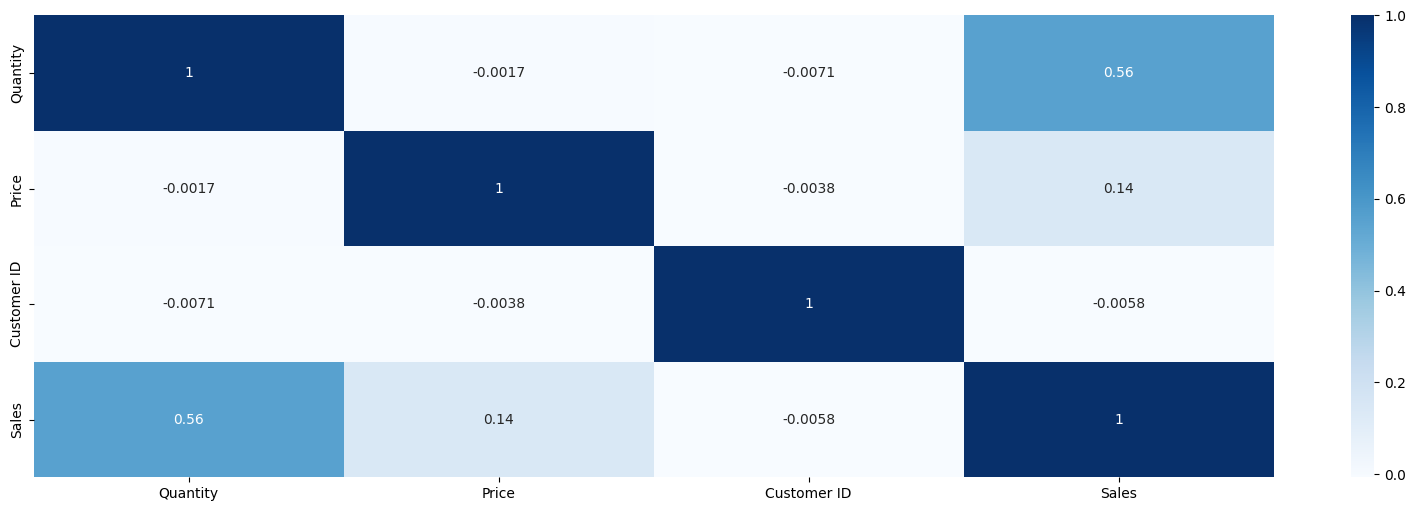

In [69]:
# Korelasi menggunakan heatmap
corr = dataset.corr()
sns.heatmap(corr, cmap="Blues", annot = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


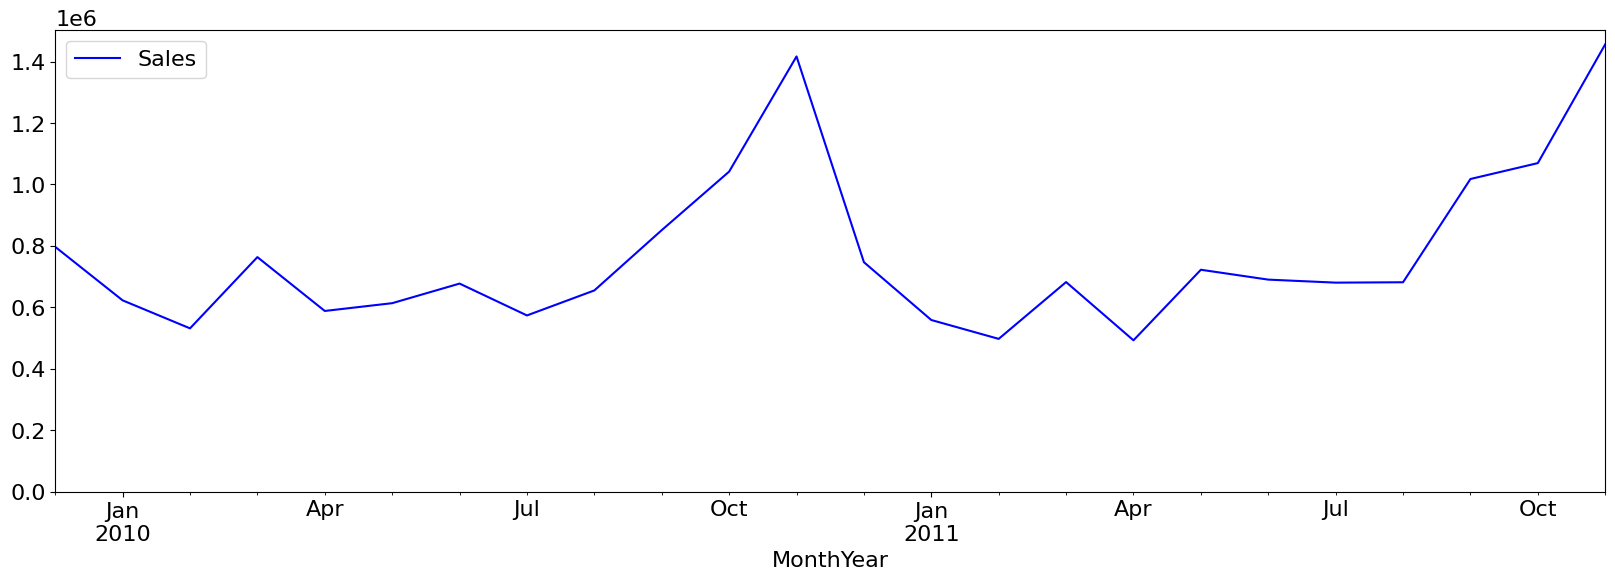

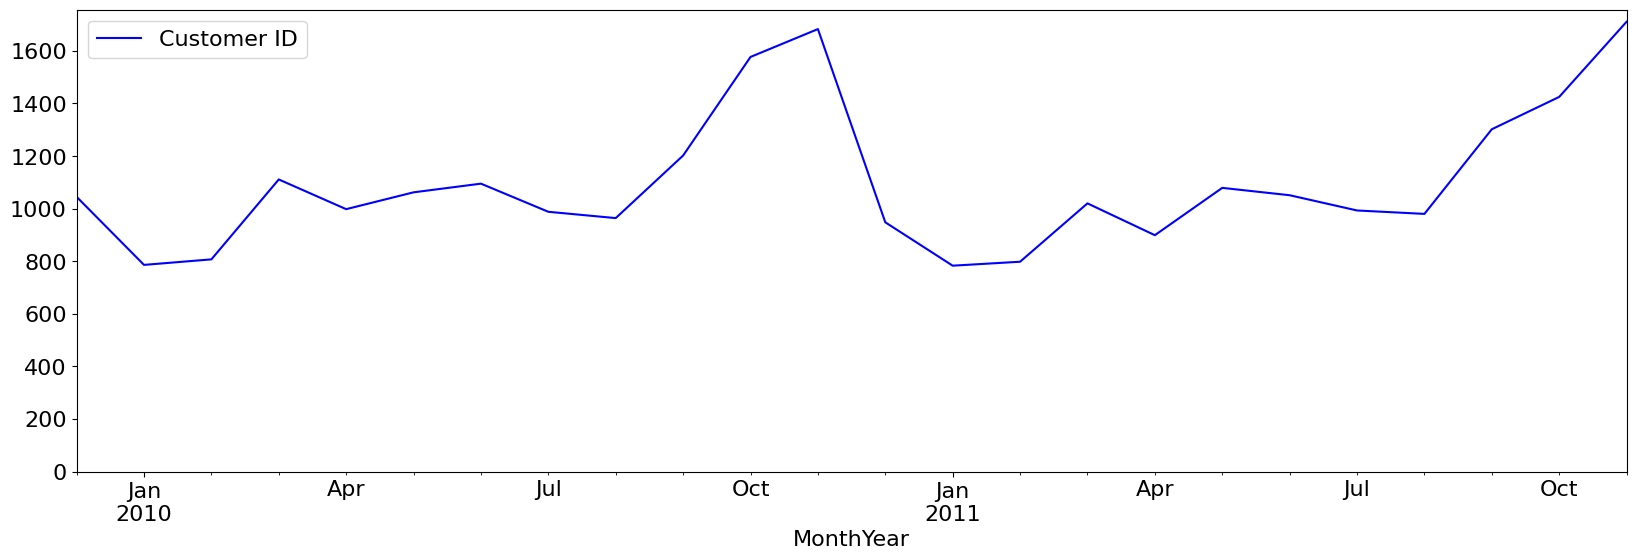

In [70]:
sales_monthly = dataset.groupby("MonthYear").agg({"Sales": "sum", "Customer ID": "nunique", "Price": "mean", "Invoice": "nunique"}).reset_index()
sales_monthly["Sales_per_trx"] = sales_monthly["Sales"] / sales_monthly["Invoice"]
sales_monthly.to_csv("sales_monthly.csv", index=False)

# Line Chart untuk melihat Sales per MonthYear
# plot sales
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
sales_monthly.plot(kind='line', x='MonthYear', y='Sales', color='blue')
plt.gca().xaxis.grid(False)
plt.ylim(ymin=0)
plt.show()


# Liner Chart untuk melihat Customer per MonthYear
# plot customer
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
sales_monthly.plot(kind='line', x='MonthYear', y='Customer ID', color='blue')
plt.gca().xaxis.grid(False)
plt.ylim(ymin=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


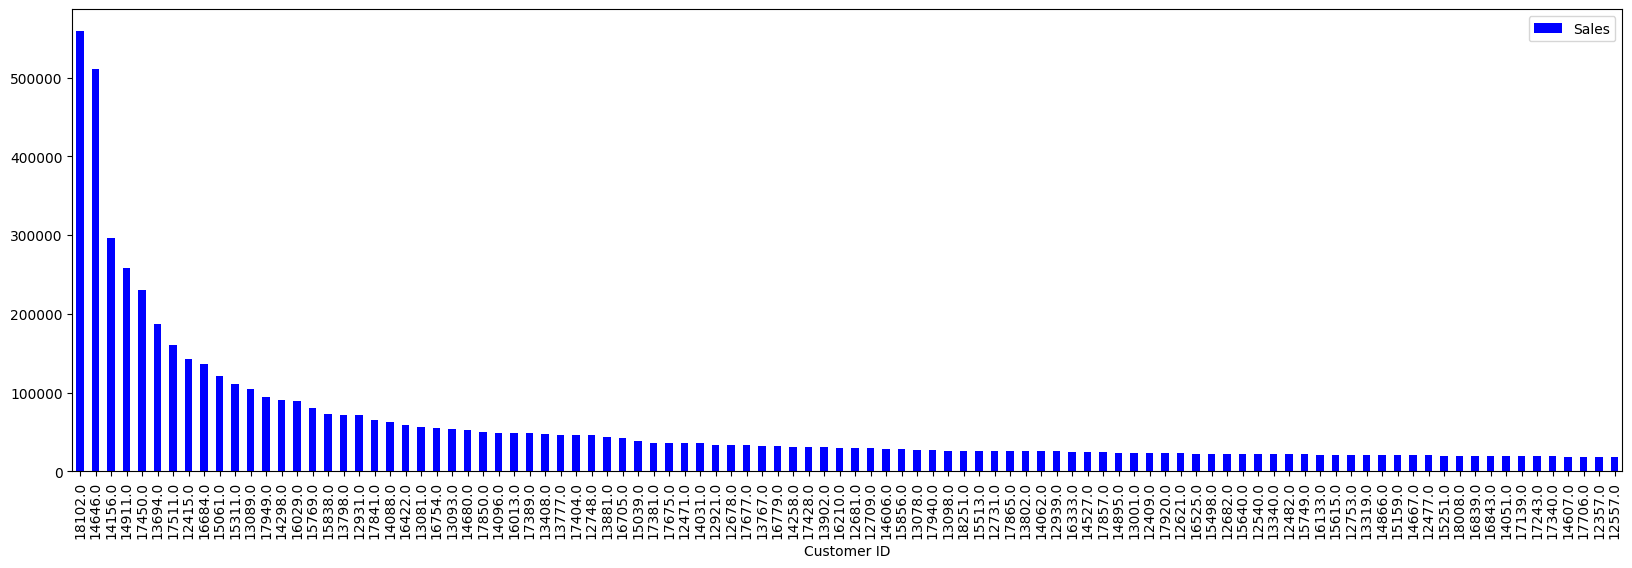

,Customer ID,Country,Invoice,Description,Quantity,Sales
5741,18102.0,United Kingdom,150,415,177717,558895.07
2299,14646.0,Netherlands,161,1041,357262,511614.05
1810,14156.0,EIRE,202,1573,162245,296063.44
2563,14911.0,EIRE,500,2716,137805,258781.54
5093,17450.0,United Kingdom,60,163,80118,229828.15
1349,13694.0,United Kingdom,161,920,182094,186889.68
5154,17511.0,United Kingdom,83,749,108234,161112.30
71,12415.0,Australia,33,520,91315,143269.29
4328,16684.0,United Kingdom,64,203,96363,136100.27
2713,15061.0,United Kingdom,137,147,72144,121066.12


In [71]:
customer = dataset.groupby(["Customer ID", "Country"]).agg({"Invoice": "nunique", "Description": "nunique", "Quantity": "sum", "Sales": "sum"}).reset_index()
customer = customer.sort_values("Sales", ascending=False)
customer.to_csv("sales_by_cutomer.csv", index=False)

# Bar Chart untuk melihat Sales per Customer
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.grid'] = False
customer.head(100).plot(kind='bar', x='Customer ID', y='Sales', color='blue')
plt.show()

customer.head(20)


## ASSOCIATION RULES

In [72]:
customer_product = dataset[['Customer ID','Description']].drop_duplicates()
customer_product['Flag'] = 1
customer_product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer ID,Description,Flag
0,13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1
1,13085.0,PINK CHERRY LIGHTS,1
2,13085.0,WHITE CHERRY LIGHTS,1
3,13085.0,"RECORD FRAME 7"" SINGLE SIZE",1
4,13085.0,STRAWBERRY CERAMIC TRINKET BOX,1
...,...,...,...
1041824,15444.0,GREEN WIRE STANDING CANDLE HOLDER,1
1041825,15444.0,3 ROSE MORRIS BOXED CANDLES,1
1041826,15444.0,LARGE ROUND WICKER PLATTER,1
1041828,15444.0,VICTORIAN SEWING BOX MEDIUM,1


In [73]:
customer_product = customer_product.pivot_table('Flag', 'Customer ID', 'Description')
customer_product = customer_product.replace(np.nan, 0)
customer_product = customer_product.astype("int64")
customer_product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18284.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18285.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Menghitung nilai support tiap itemset
frequent_itemset = apriori(customer_product, min_support = 0.05, use_colnames=True)
frequent_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.055631,(10 COLOUR SPACEBOY PEN)
1,0.050558,(12 PENCIL SMALL TUBE WOODLAND)
2,0.051573,(12 PENCILS SMALL TUBE RED RETROSPOT)
3,0.062563,(12 PENCILS SMALL TUBE SKULL)
4,0.052418,(12 PENCILS TALL TUBE SKULLS)
...,...,...
514,0.062394,"(WHITE HANGING HEART T-LIGHT HOLDER, HEART OF ..."
515,0.052249,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.,..."
516,0.050051,"(LUNCH BAG BLACK SKULL., LUNCH BAG WOODLAND, ..."
517,0.051403,"(LUNCH BAG CARS BLUE, LUNCH BAG WOODLAND, LUNC..."


In [75]:
# Membuat association rules dari frequent_itemset
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1)
rules.sort_values("confidence", ascending=True).head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
328,(WHITE HANGING HEART T-LIGHT HOLDER),"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",0.252114,0.074569,0.050389,0.199866,2.680287,0.031589,1.156595,0.838237
245,(WHITE HANGING HEART T-LIGHT HOLDER),(RECIPE BOX PANTRY YELLOW DESIGN),0.252114,0.117856,0.050389,0.199866,1.695849,0.020676,1.102495,0.548646
209,(WHITE HANGING HEART T-LIGHT HOLDER),(PACK OF 60 PINK PAISLEY CAKE CASES),0.252114,0.128678,0.051065,0.202549,1.574077,0.018624,1.092634,0.487650
51,(WHITE HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.252114,0.054954,0.051234,0.203219,3.697966,0.037380,1.186080,0.975524
69,(WHITE HANGING HEART T-LIGHT HOLDER),(GIN + TONIC DIET METAL SIGN),0.252114,0.091985,0.052756,0.209256,2.274885,0.029565,1.148304,0.749335
238,(WHITE HANGING HEART T-LIGHT HOLDER),(PLEASE ONE PERSON METAL SIGN),0.252114,0.093676,0.052925,0.209926,2.240981,0.029308,1.147138,0.740443
169,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG CARS BLUE),0.252114,0.118025,0.053940,0.213950,1.812754,0.024184,1.122035,0.599494
260,(WHITE HANGING HEART T-LIGHT HOLDER),(SCOTTIE DOG HOT WATER BOTTLE),0.252114,0.120223,0.054278,0.215292,1.790767,0.023968,1.121151,0.590437
189,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG SPACEBOY DESIGN ),0.252114,0.129861,0.054616,0.216633,1.668188,0.021876,1.110768,0.535572
153,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG BLACK SKULL.),0.252114,0.118870,0.055123,0.218645,1.839357,0.025155,1.127695,0.610162


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
